# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
  [ Kaggle](https://www.kaggle.com/code/farzadnekouei/gold-price-prediction-lstm-96-accuracy)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
gold = pd.read_csv('/content/Gold Price (2013-2023).csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
gold.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%
2582,01/02/2013,"1,689.90","1,675.80","1,695.00","1,672.10",0.06K,0.78%


In [ ]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [ ]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold.sort_values(by='Date', ascending=True, inplace=True)
gold.reset_index(drop=True, inplace=True)

In [ ]:
fig = px.line(y=gold.Price, x=gold.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64
                                Date
count                           2583
mean   2018-01-02 02:17:08.571428608
min              2013-01-02 00:00:00
25%              2015-07-02 12:00:00
50%              2018-01-03 00:00:00
75%              2020-07-04 12:00:00
max              2022-12-30 00:00:00


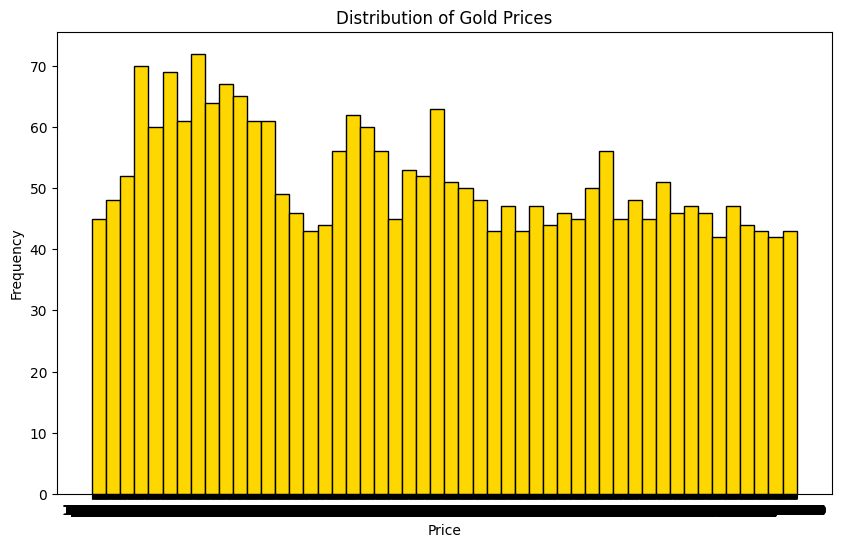

Number of duplicate rows: 0


In [ ]:
# prompt: EDA

import matplotlib.pyplot as plt
# Checking missing values
print(gold.isnull().sum())

# Descriptive statistics
print(gold.describe())

# Plotting distribution of the target variable (Price)
plt.figure(figsize=(10, 6))
plt.hist(gold['Price'], bins=50, color='gold', edgecolor='black')
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Checking for duplicate entries
print(f"Number of duplicate rows: {gold.duplicated().sum()}")

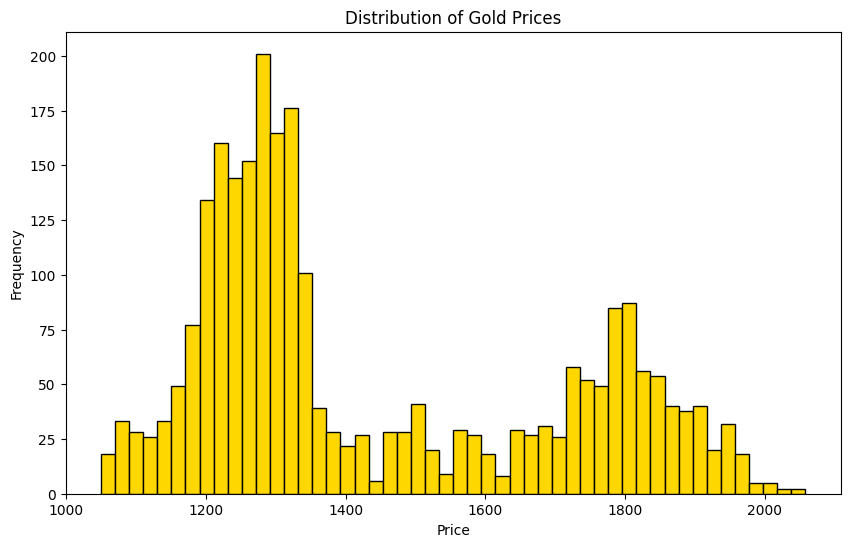

In [ ]:
# Optional: Visualize the data after removing outliers
plt.figure(figsize=(10, 6))
plt.hist(gold['Price'], bins=50, color='gold', edgecolor='black')
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
gold.drop(['Vol.', 'Change %'], axis=1, inplace=True)
NumCols = gold.columns.drop(['Date'])
gold[NumCols] = gold[NumCols].replace({',': ''}, regex=True)
gold[NumCols] = gold[NumCols].astype('float64')

In [ ]:
gold.duplicated().sum()

np.int64(0)

In [ ]:
gold.isnull().sum().sum()

np.int64(0)

In [ ]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Remove outliers from the 'Price' column
gold_cleaned = remove_outliers_iqr(gold.copy(), 'Price')

print(f"Original shape: {gold.shape}")
print(f"Shape after removing outliers: {gold_cleaned.shape}")

# Update the gold dataframe to the cleaned version
gold = gold_cleaned.copy()

Original shape: (2583, 5)
Shape after removing outliers: (2583, 5)
